In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('oil.csv')

In [3]:
data.head()

,Methode,Porosität_%,Druchlässigkeit_mD,Tiefe_m,Dichte_API,Viskosität_cP,Temp_C,Sättigung_%
0,Dampf,32.0,1675.0,365.760,12.0,2000.0,37.777778,59.590647
1,Dampf,32.0,2500.0,426.720,14.0,1500.0,37.777778,59.590647
2,Dampf,32.0,1000.0,304.800,13.0,1500.0,37.777778,59.590647
3,Dampf,35.0,1600.0,630.936,13.9,1270.0,40.555556,59.590647
4,Dampf,32.0,3030.0,320.040,14.0,1500.0,35.000000,59.590647


In [4]:
y = data.Methode

In [5]:
X = data.drop(['Methode'], axis=1)

# Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
?DecisionTreeClassifier
#max_depth means how many level of nodes

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    al

In [10]:
#instantiate the model
dt = DecisionTreeClassifier()

In [11]:
#train the model with the data
dt.fit(X,y)

DecisionTreeClassifier()

In [22]:
dt.predict(X.iloc[[220]])
#it predicts correctly

array(['Kohlendioxid'], dtype=object)

In [27]:
dt.predict(X)

array(['Dampf', 'Dampf', 'Dampf', ..., 'Kohlenwasserstoff',
       'Kohlenwasserstoff', 'Kohlenwasserstoff'], dtype=object)

In [25]:
data['predict'] = dt.predict(X)

In [26]:
data

,Methode,Porosität_%,Druchlässigkeit_mD,Tiefe_m,Dichte_API,Viskosität_cP,Temp_C,Sättigung_%,predict
0,Dampf,32.0,1675.0,365.760,12.0,2000.00,37.777778,59.590647,Dampf
1,Dampf,32.0,2500.0,426.720,14.0,1500.00,37.777778,59.590647,Dampf
2,Dampf,32.0,1000.0,304.800,13.0,1500.00,37.777778,59.590647,Dampf
3,Dampf,35.0,1600.0,630.936,13.9,1270.00,40.555556,59.590647,Dampf
4,Dampf,32.0,3030.0,320.040,14.0,1500.00,35.000000,59.590647,Dampf
...,...,...,...,...,...,...,...,...,...
3010,Kohlenwasserstoff,26.0,1250.0,3048.000,38.0,0.50,82.222222,68.000000,Kohlenwasserstoff
3011,Kohlenwasserstoff,26.0,1000.0,3352.800,38.0,0.70,73.888889,68.000000,Kohlenwasserstoff
3012,Kohlenwasserstoff,24.0,275.0,1828.800,24.0,2.00,71.111111,75.000000,Kohlenwasserstoff
3013,Kohlenwasserstoff,21.0,20.0,1584.960,37.0,0.60,61.111111,65.000000,Kohlenwasserstoff


# Evaluation Matrix

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_true=y, y_pred=dt.predict(X))

0.9983416252072969

In [33]:
from sklearn.tree import plot_tree
import matplotlib as plt

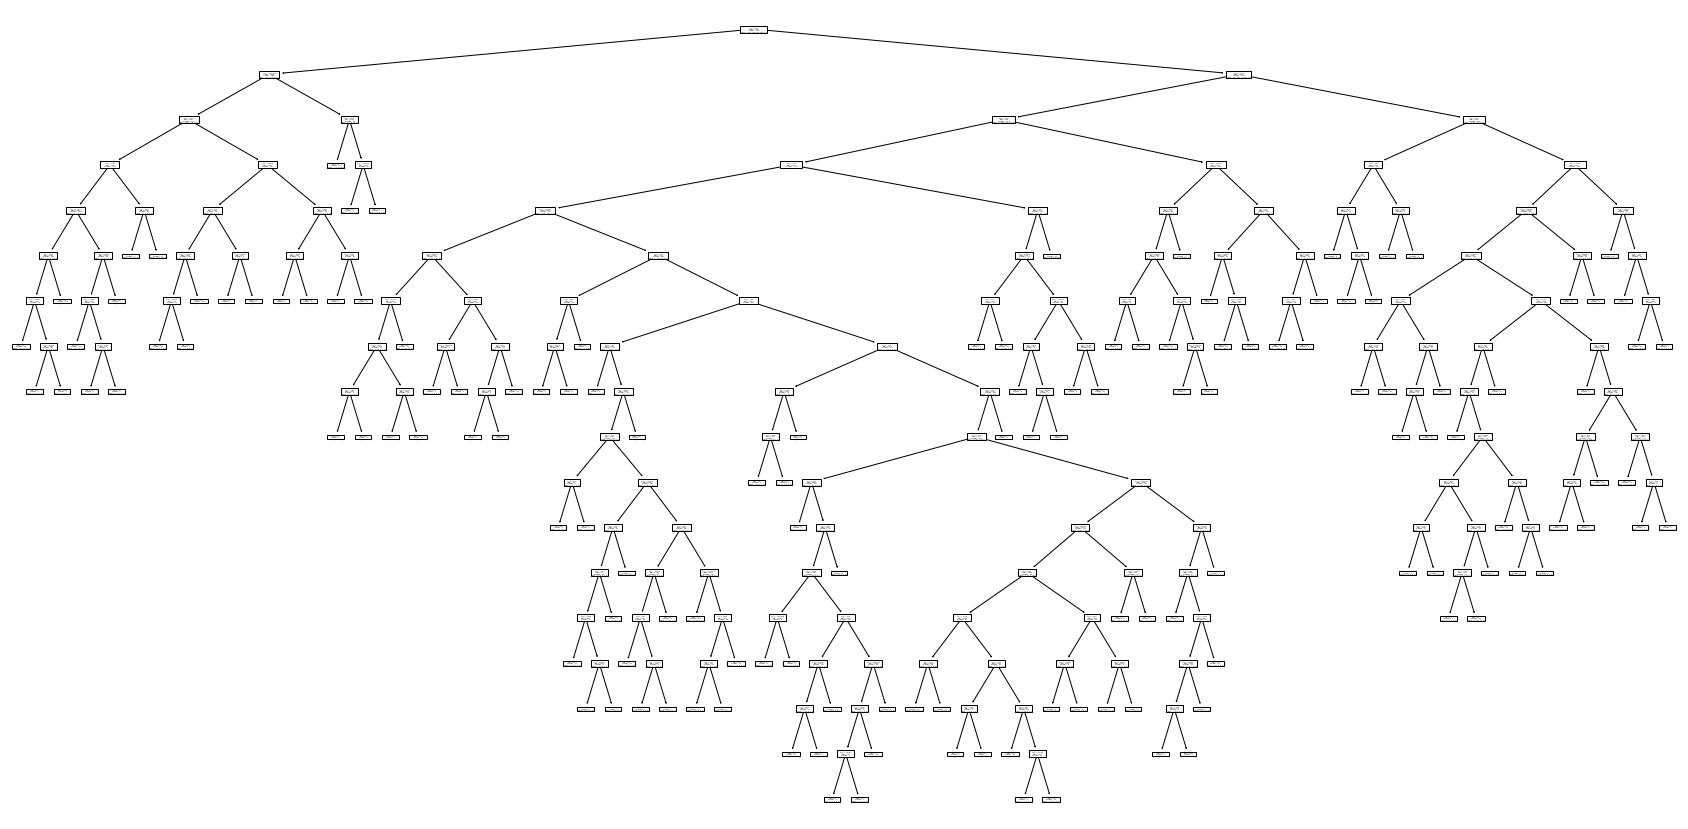

In [37]:
plt.rcParams["figure.figsize"] = (30, 15)
plot_tree(dt);

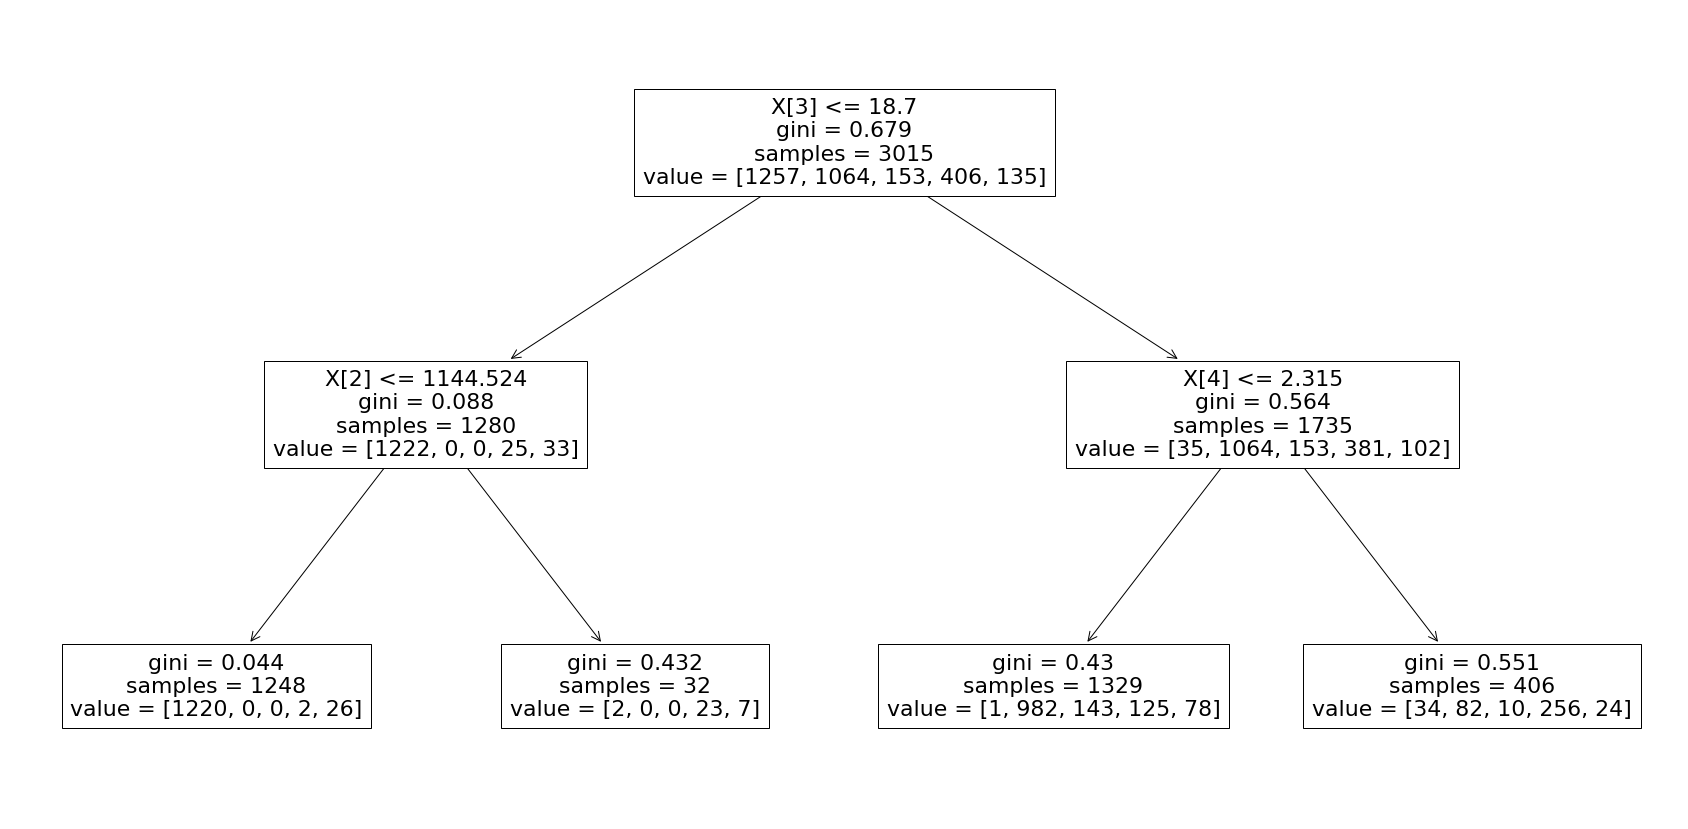

In [39]:
dt2 = DecisionTreeClassifier(max_depth=2)
dt2.fit(X,y)
plot_tree(dt2);

# Split data

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
#different run will produce different data sets

In [42]:
len(X_train)

2261

In [43]:
len(X_test)

754

In [45]:
754/2261

0.3334807607253428

In [59]:
model = DecisionTreeClassifier(min_impurity_decrease=0.01);

In [60]:
model.fit(X_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=0.01)

In [61]:
y_pred = model.predict(X_test)

In [62]:
accuracy_score(y_true=y_test, y_pred=model.predict(X_test))

0.8872679045092838

In [65]:
#Decision Tree has randome component
model2 = DecisionTreeClassifier(random_state=1)
model2.fit(X_train, y_train)
accuracy_score(y_true=y_test, y_pred=model2.predict(X_test))

0.9641909814323607

# Cross Validation

In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
model = DecisionTreeClassifier()

In [73]:
scores = cross_val_score(model, X, y, cv=500)

/usr/local/anaconda/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 135 members, which is less than n_splits=500.
  warnings.warn(("The least populated class in y has only %d"


In [74]:
import seaborn as sns

In [78]:
scores.std()

0.06543992069031447

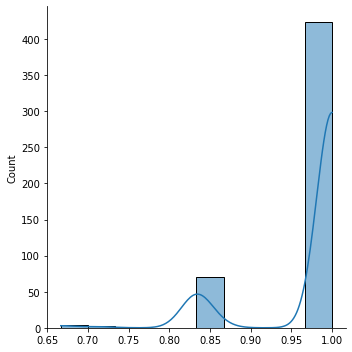

In [82]:
plt.rcParams["figure.figsize"] = (10, 10)
sns.displot(scores, kde=True)

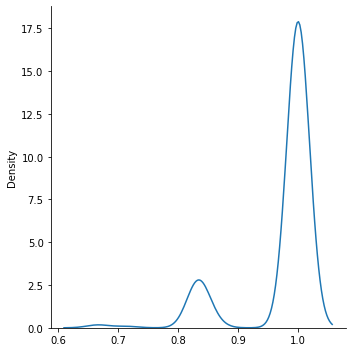

In [81]:
plt.rcParams["figure.figsize"] = (10, 10)
sns.displot(scores, kind='kde')

# Appendix

In [20]:
data.iloc[[220]]

,Methode,Porosität_%,Druchlässigkeit_mD,Tiefe_m,Dichte_API,Viskosität_cP,Temp_C,Sättigung_%
220,Kohlendioxid,8.2,13.0,2407.92,40.0,0.4,81.111111,46.076923


In [17]:
y.iloc[[220]]

220    Kohlendioxid
Name: Methode, dtype: object

In [15]:
X.iloc[[220]]

,Porosität_%,Druchlässigkeit_mD,Tiefe_m,Dichte_API,Viskosität_cP,Temp_C,Sättigung_%
220,8.2,13.0,2407.92,40.0,0.4,81.111111,46.076923


In [14]:
X.iloc[[0]]
#iloc [[x]] return a df

,Porosität_%,Druchlässigkeit_mD,Tiefe_m,Dichte_API,Viskosität_cP,Temp_C,Sättigung_%
0,32.0,1675.0,365.76,12.0,2000.0,37.777778,59.590647
